## [Core Operations](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_table_of_contents_core/py_table_of_contents_core.html#py-table-of-content-core)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

x=np.uint8([250])
y=np.uint8([10])
x+y,cv2.add(x,y)

(array([4], dtype=uint8), array([[255]], dtype=uint8))

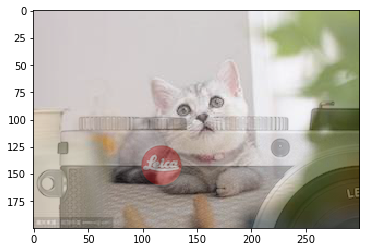

In [9]:
def show_cv_img(img):
    tmp=np.apply_along_axis(lambda x:x[::-1],2,img)
    plt.subplots()
    plt.imshow(tmp)
    plt.show()
    

#Image Blending
cat=cv2.imread('cat.jpg')
leica=cv2.imread('leica.jpg')[:cat.shape[0],:cat.shape[1],:]
dst=cv2.addWeighted(cat,0.7,leica,0.3,0)
show_cv_img(dst)

In [ ]:
#Bitwise Operation( AND, OR, NOT and XOR operations)
#They will be highly useful while extracting any part of the image (as we will see in coming chapters), 
#defining and working with non-rectangular ROI etc.


